<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/Rupesh_Thapa_Lab3_DLClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Binary Classifier

A binary classifier is a type of machine learning model that categorizes inputs into one of two distinct classes. Essentially, it answers a yes/no or true/false type of question for each input data point.

## Examples of Binary Classification Problems:

Spam Detection: Classifying emails as either "spam" or "not spam".

Medical Diagnosis: Determining whether a patient has a particular disease (e.g., cancer) or not.

Credit Approval: Deciding whether a loan application should be approved or denied.

Sentiment Analysis: Analyzing text to determine if the sentiment is positive or negative.

## Characteristics of Binary Classifiers:

Two Classes: The classifier distinguishes between exactly two classes, often labeled as 0 and 1 or -1 and 1.

Decision Boundary: The model learns a boundary that separates the two classes based on the features of the input data.

Performance Metrics: Common metrics include accuracy, precision, recall, F1 score, and the area under the Receiver Operating Characteristic (ROC) curve.

## Load Dataset

Here we are using IMDB Movie Reviews Dataset and it is splitted in training and testing set.

• 50,000 highly polarized reviews from the Internet Movie Database

• 25,000 reviews for training

• 25,000 reviews for testing

• Each set 50% negative, 50% positive reviews

• Prepackaged with Keras

• Preprocessed



In [ ]:
# Import the imdb dataset from the tensorflow.keras.datasets module
from tensorflow.keras.datasets import imdb

In [ ]:
# Load the IMDb dataset from keras.datasets.imdb module
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    # Set the number of words to keep in the dataset.
    # The words with the top 10000 word indices from the reviews are kept.
    num_words=10000
)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# This line of code accesses the first element of the train_data list
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# This line of code returns the first element of the 'train_labels' list
train_labels[0]

1

## Decoding Data

Using get_word_index we can get data indices to check what are the contents of the dataset

In [ ]:
# Get the word index from the IMDb dataset
word_index = imdb.get_word_index()
# Create a reverse word index dictionary
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
# Replace the encoded review with the decoded review
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])

## Preparing the Data

Using the multi-hot encode method to vectorize the inputs to tensors of
length 10,000. Outputs are simply cast to float.

• Sequence [6,50] turns into a zeroes vector with ones in positions 6 and 50
[0,0,0,0...,1,...,0,1,0,...,0,0,0]

In [ ]:
import numpy as np
# Function to vectorize sequences
def vectorize_sequences(sequences, dimension = 10000):
  # Initialize the result array with zeros
  results = np.zeros((len(sequences), dimension))
  # Iterate through the sequences
  for i, sequence in enumerate(sequences):
    # Iterate through the elements in the sequence
    for j in sequence:
      # Set the element to 1 in the result array
      results[i, j] = 1.
  # Return the result array
  return results
# Vectorize the training data
x_train = vectorize_sequences(train_data)
# Vectorize the testing data
x_test = vectorize_sequences(test_data)

# Convert the training labels to float32
y_train = np.asarray(train_labels).astype("float32")
# Convert the testing labels to float32
y_test = np.asarray(test_labels).astype("float32")

# Print the first vectorized sequence
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Building the model

Inputs are vector with 1s and 0s

A type of model good for this input is densely connected

In [ ]:
# Import the keras module from tensorflow
from tensorflow import keras
# Import the layers module from keras
from tensorflow.keras import layers

# Create a Sequential model
model = keras.Sequential([
    # Create a Dense layer with 16 neurons and apply the relu activation function
    layers.Dense(16, activation="relu"),
    # Create a Dense layer with 16 neurons and apply the relu activation function
    layers.Dense(16, activation="relu"),
    # Create a Dense layer with 1 neuron and apply the sigmoid activation function
    layers.Dense(1, activation="sigmoid")
])

## Compiling the model
This is the step where the optimizer, loss and metrics are defined

• For optimizer, rmsprop is currently a very effective ”general” option

• An also common loss function is crossentropy (binary in this case)

• Crossentropy is good to measure distance between distributions

In [ ]:
# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer="rmsprop",  # Specify the optimizer
              loss="binary_crossentropy",  # Specify the loss function
              metrics=["accuracy"])  # Specify the metrics

## Training and Validation

• A deep learning model is never evaluated on its training data

• Use a validation set to monitor accuracy during training

In [ ]:
# Split the data into a training set and a validation set
x_val = x_train[:10000]
# The remaining data will be used as the training set
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
# The remaining data will be used as the training set
partial_y_train = y_train[10000:]

In [ ]:
# Fit the model on a sample of the training data
history = model.fit(partial_x_train,
                    # This is the target variable, which is the dependent variable
                    partial_y_train,
                    # Number of epochs, or complete passes through the data
                    epochs=20,
                    # Number of samples per gradient update
                    batch_size=512,
                    # Data to be used for validation, in this case the validation data
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.5072 - accuracy: 0.7800 - val_loss: 0.3835 - val_accuracy: 0.8643
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3072 - accuracy: 0.8994 - val_loss: 0.3220 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2361 - accuracy: 0.9188 - val_loss: 0.2969 - val_accuracy: 0.8801
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1897 - accuracy: 0.9381 - val_loss: 0.2734 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1579 - accuracy: 0.9487 - val_loss: 0.2767 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1416 - accuracy: 0.9538 - val_loss: 0.2910 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1152 - accuracy: 0.9665 - val_loss: 0.2977 - val_accuracy: 0.8827
Epoch 8/20
30

In [ ]:
# Create a dictionary to store the history of the model's training
history_dict = history.history

# Get the keys of the history dictionary
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Loss and accuracy plots

• Validation loss decreases every epoch (expected)

• Validation accuracy peaks at certain value, then decreases (unexpected)

• Model performs well on training but bad on validation!

• Possible solutions: early stop, L1 and L2 regularization

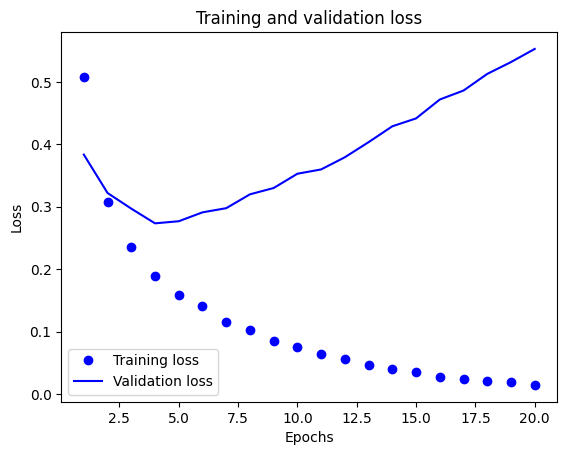

In [ ]:
import matplotlib.pyplot as plt
# Define a function called 'loss_plt' that takes in one argument, 'history'
def loss_plt(history):
    # Create a dictionary from the history object
    history_dict = history.history
    # Create lists for the training and validation loss values
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    # Create a list for the epochs
    epochs = range(1, len(loss_values)+1)
    # Plot the training loss in blue with the epochs on the x-axis
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    # Plot the validation loss in blue with the epochs on the x-axis
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    # Set the title of the plot
    plt.title("Training and validation loss")
    # Set the x-axis label
    plt.xlabel("Epochs")
    # Set the y-axis label
    plt.ylabel("Loss")
    # Add a legend to the plot
    plt.legend()
    # Display the plot
    plt.show()

# Call the 'loss_plt' function with the history object
loss_plt(history)

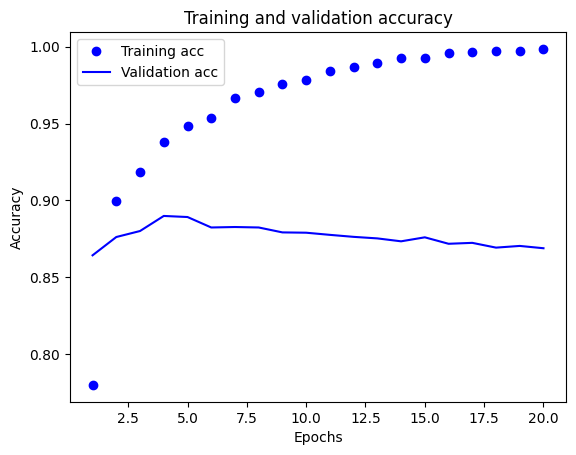

In [ ]:
# Define a function called 'acc_plt' that takes in one argument, 'history'
def acc_plt(history):
    # Clear the current figure
    plt.clf()
    # Retrieve the training and validation accuracy from the history dictionary
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    # Create a list of epochs
    epochs = range(1, len(acc)+1)
    # Plot the training accuracy
    plt.plot(epochs, acc, "bo", label="Training acc")
    # Plot the validation accuracy
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    # Set the title of the plot
    plt.title("Training and validation accuracy")
    # Set the x-axis label
    plt.xlabel("Epochs")
    # Set the y-axis label
    plt.ylabel("Accuracy")
    # Add a legend to the plot
    plt.legend()
    # Display the plot
    plt.show()

# Call the 'acc_plt' function and pass in the 'history' argument
acc_plt(history)

## Predicting Data

After training the model we can predict outputs on never seen outputs i.e. Test Dataset

• The predict function will take x_test set and get probability for each entry
• Note the model is sure for some samples and not so sure for
others

In [ ]:
# This line of code is used to predict the output of the model based on the input data x_test
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.02981799],
       [0.99999946],
       [0.4800119 ],
       ...,
       [0.00262915],
       [0.03893942],
       [0.954877  ]], dtype=float32)

## Model 2

Here, we are using the same methods as above but only adding another layer in above models and running the same thing as above to predict and test

In [ ]:
# Create a Sequential model with 4 layers
model2 = keras.Sequential([
    # First layer: Dense layer with 16 neurons and ReLU activation
    layers.Dense(16, activation="relu"),
    # Second layer: Dense layer with 16 neurons and ReLU activation
    layers.Dense(16, activation="relu"),
    # Third layer: Dense layer with 16 neurons and ReLU activation
    layers.Dense(16, activation="relu"),
    # Fourth layer: Dense layer with 1 neuron and Sigmoid activation
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model using the RMSprop optimizer and binary crossentropy loss function
# Metrics used to monitor the training process are accuracy
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Fit the model2 with the partial_x_train and partial_y_train data for 20 epochs, with a batch size of 512, and validate the results using the x_val and y_val data
history = model2.fit(partial_x_train,
                    # Train the model on the partial_y_train data
                    partial_y_train,
                    # Fit the model for 20 epochs
                    epochs=20,
                    # Set the batch size to 512
                    batch_size=512,
                    # Validate the results using the x_val and y_val data
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 89ms/step - loss: 0.5339 - accuracy: 0.7653 - val_loss: 0.4000 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3184 - accuracy: 0.8939 - val_loss: 0.3165 - val_accuracy: 0.8751
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2305 - accuracy: 0.9201 - val_loss: 0.2876 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1858 - accuracy: 0.9357 - val_loss: 0.2975 - val_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1564 - accuracy: 0.9441 - val_loss: 0.2841 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1346 - accuracy: 0.9540 - val_loss: 0.3044 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1083 - accuracy: 0.9645 - val_loss: 0.3110 - val_accuracy: 0.8838
Epoch 8/20
30

In [ ]:
# Create a dictionary to store the history of the model's training
history_dict = history.history

# Get the keys of the history dictionary
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

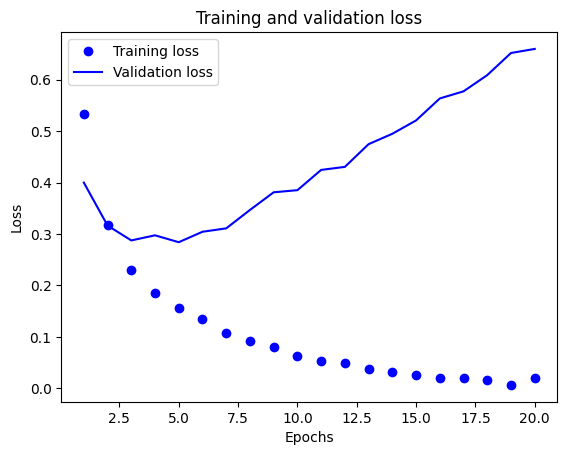

In [ ]:
# This function is used to plot the loss function over time
loss_plt(history)

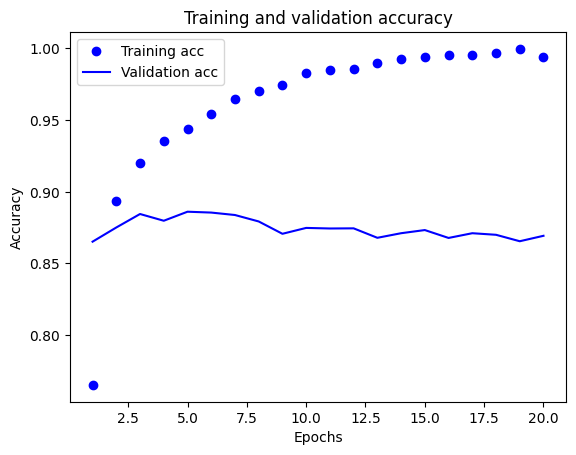

In [ ]:
# This function is used to plot the accuracy of a model over time
# It takes in the history object of a trained model
acc_plt(history)

In [ ]:
# This line of code is used to predict the values using the model2 on the x_test data
model2.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[8.6984187e-03],
       [9.9999976e-01],
       [8.5734791e-01],
       ...,
       [6.7836244e-04],
       [2.5504176e-03],
       [9.5083827e-01]], dtype=float32)

## Model 3

Here, in model 3 we are using the same model 1 but changing the neurons from 16 to 32 and comparing the difference.

In [ ]:
# Create a Sequential model with three Dense layers
model3 = keras.Sequential([
    # First Dense layer with 32 neurons and ReLU activation function
    layers.Dense(32, activation="relu"),
    # Second Dense layer with 32 neurons and ReLU activation function
    layers.Dense(32, activation="relu"),
    # Third Dense layer with 1 neuron and Sigmoid activation function
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model with the specified optimizer, loss function, and metrics
model3.compile (optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

In [ ]:
# Fit the model on a sample of the training data
history = model3.fit(partial_x_train,
                    # This is the target variable, which is the dependent variable
                    partial_y_train,
                    # Number of epochs, or complete passes through the data
                    epochs = 20,
                    # Number of samples per gradient update
                    batch_size=512,
                    # Data to be used for validation, in this case, the validation data
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.5307 - accuracy: 0.7653 - val_loss: 0.3928 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3214 - accuracy: 0.8879 - val_loss: 0.3045 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2400 - accuracy: 0.9153 - val_loss: 0.2839 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1911 - accuracy: 0.9319 - val_loss: 0.2972 - val_accuracy: 0.8786
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1573 - accuracy: 0.9463 - val_loss: 0.2909 - val_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1374 - accuracy: 0.9514 - val_loss: 0.3023 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1147 - accuracy: 0.9611 - val_loss: 0.3127 - val_accuracy: 0.8805
Epoch 8/20
30

In [ ]:
# Create a dictionary to store the history of the model's training
history_dict = history.history

# Get the keys of the history dictionary
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

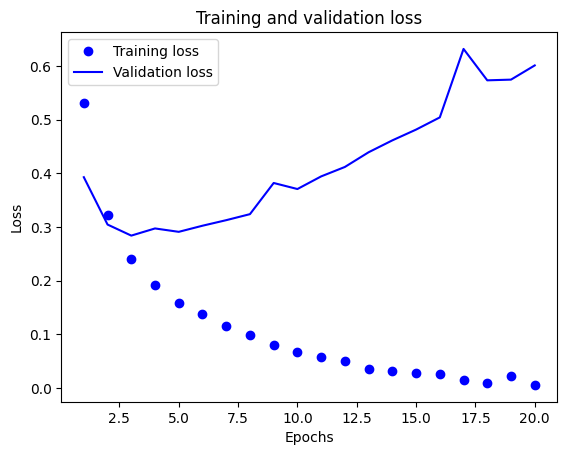

In [ ]:
# This function is used to plot the loss function over time
loss_plt(history)

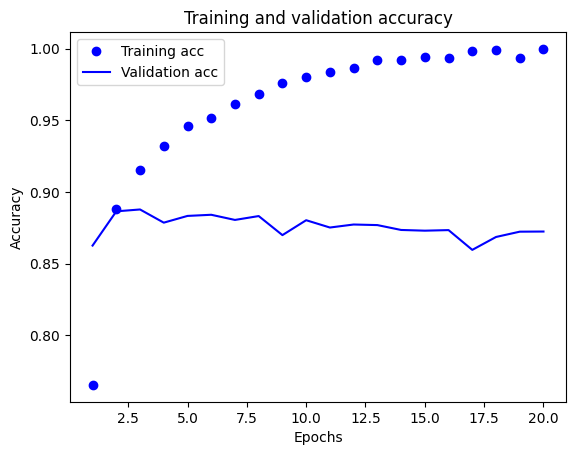

In [ ]:
# This function is used to plot the accuracy of a model over time
# It takes in the history object of a trained model
acc_plt(history)

In [ ]:
# This line of code is used to predict the output of the model based on the input data x_test
model3.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[1.5448279e-02],
       [9.9999857e-01],
       [2.2045068e-01],
       ...,
       [7.8734552e-04],
       [5.3388458e-03],
       [9.9010330e-01]], dtype=float32)

## Model 4

For, this model we are using mse as loss function instead of binary crossentropy as seen in model 1.

In [ ]:
# Create a Sequential model with three layers
model4 = keras.Sequential([
    # Create a Dense layer with 16 neurons and ReLU activation
    layers.Dense(16, activation="relu"),
    # Create a Dense layer with 16 neurons and ReLU activation
    layers.Dense(16, activation="relu"),
    # Create a Dense layer with 1 neuron and Sigmoid activation
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model with the specified optimizer, loss, and metrics
model4.compile (optimizer="rmsprop",
               loss="mse",
               metrics=["accuracy"])

In [ ]:
# Fit the model on a sample of the training data
history = model4.fit(partial_x_train,
                    # This is the target variable, which is the dependent variable
                    partial_y_train,
                    # Number of epochs, or complete passes through the data
                    epochs = 20,
                    # Number of samples per gradient update
                    batch_size=512,
                    # Data to be used for validation, in this case, the validation data
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.1783 - accuracy: 0.7778 - val_loss: 0.1294 - val_accuracy: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1031 - accuracy: 0.8904 - val_loss: 0.1045 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0783 - accuracy: 0.9138 - val_loss: 0.0911 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0640 - accuracy: 0.9287 - val_loss: 0.0864 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0543 - accuracy: 0.9404 - val_loss: 0.0913 - val_accuracy: 0.8753
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0476 - accuracy: 0.9475 - val_loss: 0.0832 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0424 - accuracy: 0.9546 - val_loss: 0.0836 - val_accuracy: 0.8844
Epoch 8/20
30

In [ ]:
# Create a dictionary to store the history of the model's training
history_dict = history.history

# Get the keys of the history dictionary
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

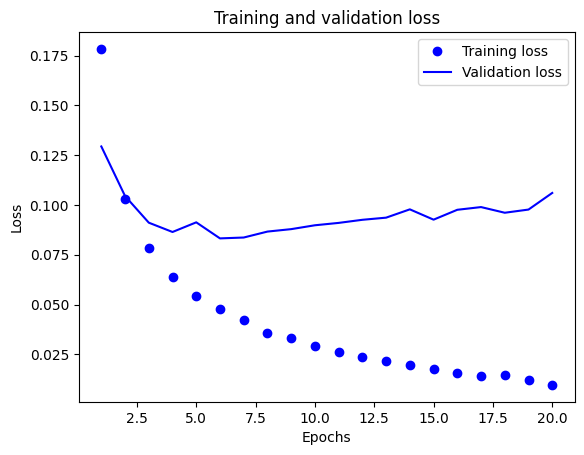

In [ ]:
# This function is used to plot the loss function over time
loss_plt(history)

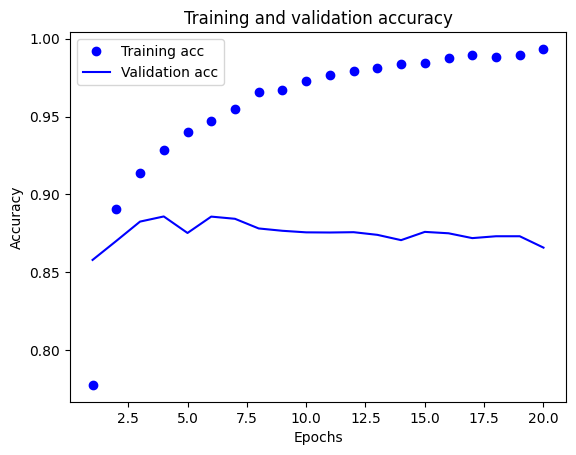

In [ ]:
# This function is used to plot the accuracy of a model over time
# It takes in the history object of a trained model
acc_plt(history)

In [ ]:
# This line of code is used to predict the output of the model based on the input data x_test
model4.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.03700784],
       [0.9999047 ],
       [0.73821557],
       ...,
       [0.02767834],
       [0.02578565],
       [0.57323724]], dtype=float32)

## Model 5

For, model 5 we are using the same method as seen above but only changing the activation function to tanh.

In [ ]:
# Create a Sequential model with three layers
model5 = keras.Sequential([
    # First layer: Dense layer with 16 neurons and tanh activation function
    layers.Dense(16, activation="tanh"),
    # Second layer: Dense layer with 16 neurons and tanh activation function
    layers.Dense(16, activation="tanh"),
    # Third layer: Dense layer with 1 neuron and sigmoid activation function
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model with the specified optimizer, loss function, and metrics
model5.compile (optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

In [ ]:
# Fit the model on a sample of the training data
history = model5.fit(partial_x_train,
                    # This is the target variable, which is the dependent variable
                    partial_y_train,
                    # Number of epochs, or complete passes through the data
                    epochs = 20,
                    # Number of samples per gradient update
                    batch_size=512,
                    # Data to be used for validation, in this case, the validation data
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.4996 - accuracy: 0.7871 - val_loss: 0.3941 - val_accuracy: 0.8476
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3014 - accuracy: 0.8971 - val_loss: 0.3010 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2206 - accuracy: 0.9232 - val_loss: 0.2973 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1727 - accuracy: 0.9425 - val_loss: 0.2977 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1415 - accuracy: 0.9529 - val_loss: 0.2875 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1176 - accuracy: 0.9596 - val_loss: 0.3062 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0898 - accuracy: 0.9722 - val_loss: 0.3375 - val_accuracy: 0.8815
Epoch 8/20
30

In [ ]:
# Create a dictionary to store the history of the model's training
history_dict = history.history

# Get the keys of the history dictionary
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

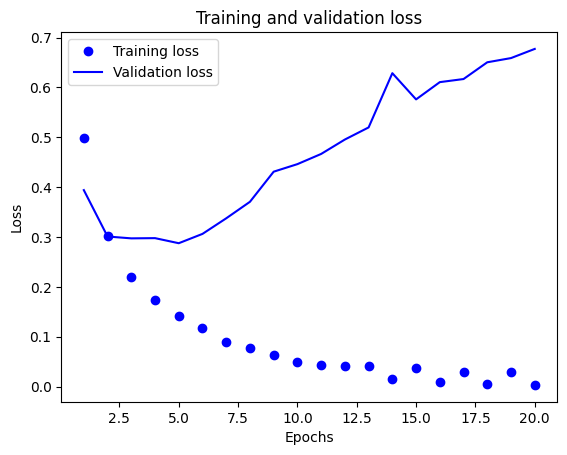

In [ ]:
# This function is used to plot the loss function over time
loss_plt(history)

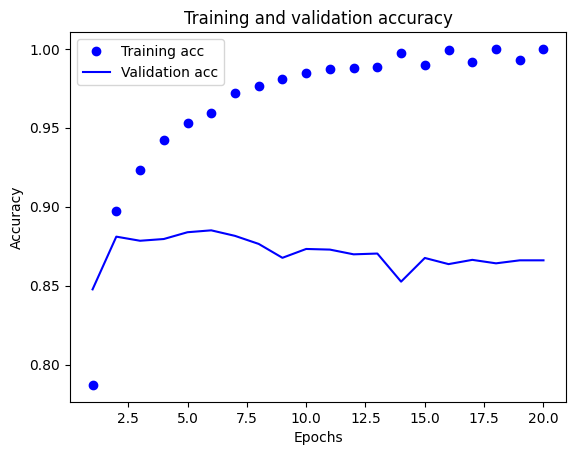

In [ ]:
# This function is used to plot the accuracy of a model over time
acc_plt(history)

In [ ]:
# This line of code is used to predict the output of the model based on the input data x_test
model5.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[2.5091460e-03],
       [9.9995703e-01],
       [4.6078619e-02],
       ...,
       [3.1148799e-04],
       [1.0042181e-02],
       [9.9410856e-01]], dtype=float32)

## Comparison between models result

  Model Architectures: Models with varying numbers of dense layers and neurons were constructed. Increasing the complexity of the model architecture by adding more layers and neurons can enhance the model's ability to capture intricate patterns in the data. However, excessively complex models may lead to overfitting, where the model performs well on training data but poorly on unseen data.

  Activation Functions: Different activation functions, including ReLU and tanh, were utilized in the hidden layers, while the output layer typically employed the sigmoid activation function. Activation functions influence how information is propagated through the network and transformed. ReLU is often a suitable choice for hidden layers due to its simplicity and ability to mitigate the vanishing gradient problem, while sigmoid is commonly used for binary classification tasks to squash outputs between 0 and 1.

  Loss Functions and Optimizers: Binary cross-entropy loss function was employed for binary classification tasks, while RMSprop served as the optimizer. The choice of loss function and optimizer depends on the problem domain and network architecture. RMSprop is a popular choice, especially for sequential data, as it adapts the learning rate during training. If the task were changed to regression, where the goal is to predict a continuous value rather than a binary classification, MSE could be a suitable loss function.

  Training Process: The models were trained over 20 epochs with a batch size of 512. Monitoring the training process through visualization of training and validation loss/accuracy over epochs is essential for diagnosing issues such as overfitting and underfitting.

  Prediction Performance: Each model was evaluated on the test data, and their predictions were generated. The performance of the models can be assessed based on metrics such as accuracy.